Abstract
 
This project examines whether the intensity of religious belief in a society has any meaningful relationship with its murder rate, focusing specifically on the year 2020. We combine homicide data with global religious composition measures to explore whether stronger religious adherence, frequency of religious practice, or broader indicators of religious freedom correlate with higher or lower levels of violence. Our analysis also incorporates corruption and sexual-assault statistics to situate religion within a wider set of social conditions that influence crime. The goal is not simply to test whether religion and murder rates move together, but to evaluate whether religion could plausibly play a causal role once these larger structural factors are considered. By comparing countries and regions in a consistent global dataset, this project offers a clearer picture of how religious commitment functions within modern societies and whether it meaningfully shapes patterns of violence.


Intro TBD 

In [1]:
import pandas as pd

df = pd.read_csv('Homicides.csv')
df.drop(['Region', 'Subregion', 'Dimension', 'Category', 'Year', 'Unit of measurement', 'Source'], axis=1, inplace=True)
df.head()

country = df.groupby(by='Country')['VALUE'].sum()
country

Country
Afghanistan                           2570.0
Albania                                394.0
Algeria                               5353.0
Andorra                                  4.0
Antigua and Barbuda                     88.0
                                       ...  
Uruguay                               3978.0
Uzbekistan                            1258.0
Vanuatu                                  4.0
Venezuela (Bolivarian Republic of)    8384.0
Zimbabwe                              1560.0
Name: VALUE, Length: 139, dtype: float64

Data
This project draws on a merged dataset that brings together homicide statistics, sexual-assault reports, corruption measures, and religious composition for the year 2020. All of the underlying information comes from publicly available international sources, including the United Nations Office on Drugs and Crime and the Pew Research Center’s global religion database. Because each dataset is structured at the national level, every row in the final table represents a single country in 2020, which provides a consistent framework for comparing different social and religious environments.
The religious data come from the Pew Research Center’s 2020 global survey, which reports how many individuals in each country identify with major religious traditions such as Christianity, Islam, Hinduism, Buddhism, Judaism, folk religions, and the unaffiliated. To capture how religious a society is overall, we created a measure called Religion Density. This expresses the share of the population belonging to any religious group and gives us a standardized way to compare countries with very different population sizes and religious distributions. Since our goal is to understand whether the intensity of religious belief relates to patterns of violence, this variable plays a central role in the analysis.
The homicide and sexual-offense data come from the UNODC’s 2020 crime reports. These provide the number of recorded murders and sexual assaults for each country, along with population figures that allow us to normalize crime statistics. Using these values, we constructed Homicide Density and Sex Assault Density, which represent the proportion of the population involved in each type of crime. This standardization is important because it allows meaningful comparisons between countries that differ widely in size. These crime measures serve as the primary outcomes in the analysis and form the basis for evaluating whether more or less religious societies experience different levels of violence.
To situate religion and crime within a broader social context, we incorporated a corruption measure for each country in 2020. From this, we created Corruption Density, a population-adjusted indicator that helps us evaluate institutional quality. Corruption is closely tied to social trust, government effectiveness, and legal enforcement, all of which can influence crime levels. Including this measure helps ensure that any observed association between religion and homicide is not simply capturing the effect of weak institutions.
All datasets were merged using country name as the linking key, producing the final file, which contains variables for population, religious composition, crime totals, corruption scores, and all corresponding density measures. By aligning every measure to the same year and standardizing key variables by population, the dataset allows us to examine whether differences in religious adherence correspond with differences in homicide levels once broader societal conditions are taken into account. This merged structure establishes the empirical foundation for the rest of the analysis and enables a systematic comparison of religion, crime, and social order across countries.


In [2]:
# Religion
import numpy as np

religion = pd.read_csv('religion.csv')
religion.drop(['Region', 'Level', 'Countrycode'], axis=1, inplace=True)
religion.query('Year == 2020', inplace=True)

religion['Population'] = (
    religion['Population']
    .astype(str)
    .str.replace(',', '', regex=False)         
)
religion['Religiously_unaffiliated'] = (
    religion['Religiously_unaffiliated']
    .astype(str)
    .str.replace(',', '', regex=False)
)

religion['Religion Density'] = 1 - (religion['Religiously_unaffiliated'].astype(int) / religion['Population'].astype(int))
religion

,Country,Year,Population,Christians,Muslims,Religiously_unaffiliated,Buddhists,Hindus,Jews,Other_religions,Religion Density
1,All World,2020,7885807101,"2,268,860,679","2,022,590,461",1905359982,"324,185,581","1,177,861,089","14,779,638","172,169,677",0.758381
3,All Asia-Pacific,2020,4544798237,"268,839,155","1,187,663,747",1492753842,"316,111,123","1,166,709,664","185,058","112,535,650",0.671547
5,All Europe,2020,752957406,"505,138,687","45,505,934",190322687,"2,539,594","2,152,636","1,277,202","6,020,665",0.747233
7,All Latin America-Caribbean,2020,646240245,"546,922,208","753,352",77150335,"326,820","695,342","390,861","20,001,329",0.880617
9,All Middle East-North Africa,2020,439686888,"12,918,830","414,112,362",1858569,"88,708","3,223,451","6,788,404","696,565",0.995773
...,...,...,...,...,...,...,...,...,...,...,...
407,Vietnam,2020,98079191,"8,170,016","70,694",66373765,"22,578,634","40,495",125,"845,463",0.323264
409,Western Sahara,2020,549365,847,"546,903",1390,0,0,0,225,0.997470
411,Yemen,2020,36134864,"20,138","36,085,366",22243,197,"2,798",73,"4,047",0.999384
413,Zambia,2020,19059395,"18,731,646","97,449",11389,363,"3,061",191,"215,296",0.999402


In [4]:
# Sex
sex = pd.read_csv('Sex.csv')
sex.drop(['Iso3_code', 'Region', 'Subregion', 'Indicator', 'Dimension', 'Category'], axis=1, inplace=True)
sex = sex.groupby(by='Country')['VALUE'].sum()
sex

Country
Albania                                 1055
Algeria                                11948
Antigua and Barbuda                      183
Argentina                             191104
Armenia                                  412
                                      ...   
United Kingdom (Northern Ireland)      21977
United Kingdom (Scotland)              29045
United States of America             1047935
Uruguay                                 6998
Uzbekistan                              1382
Name: VALUE, Length: 108, dtype: int64

In [5]:
# Corruption 
corruption = pd.read_csv('Corruption.csv')
corruption.query('`Unit of measurement` == "Counts"', inplace=True)
corruption = corruption.groupby(by='Country')['VALUE'].sum()
corruption

Country
Albania                                7276.0
Algeria                                4208.0
Antigua and Barbuda                     919.0
Argentina                            229808.0
Armenia                                2279.0
                                       ...   
United Kingdom (Northern Ireland)     25063.0
United Kingdom (Scotland)            108546.0
United States of America               9393.0
Uruguay                              146276.0
Uzbekistan                              158.0
Name: VALUE, Length: 107, dtype: float64

In [6]:
# Merging
merged_df = pd.merge(religion, country, how='inner', on=['Country'])
merged_df = pd.merge(merged_df, sex, how='inner', on=['Country'], suffixes=('_hom', '_sex'))
merged_df = pd.merge(merged_df, corruption, how='inner', on=['Country'])
merged_df['Homicide Density'] = merged_df['VALUE_hom'].astype(int) / merged_df['Population'].astype(int) * 100
merged_df['Sex Assault Density'] = merged_df['VALUE_sex'].astype(int) / merged_df['Population'].astype(int) * 100
merged_df = merged_df.rename(columns={'VALUE': 'VALUES_corr'})
merged_df['Corruption Density'] = merged_df['VALUES_corr'].astype(int) / merged_df['Population'].astype(int) * 100
# merged_df.sort_values(by='Homicide Density', ascending=False)
merged_df.head()


,Country,Year,Population,Christians,Muslims,Religiously_unaffiliated,Buddhists,Hindus,Jews,Other_religions,Religion Density,VALUE_hom,VALUE_sex,VALUES_corr,Homicide Density,Sex Assault Density,Corruption Density
0,Albania,2020,2871954,"511,657","2,139,813",219787,5,20,289,382,0.923471,394.0,1055,7276.0,0.013719,0.036735,0.253347
1,Algeria,2020,44042091,"129,920","43,329,641",557664,"6,607",0,57,"18,202",0.987338,5353.0,11948,4208.0,0.012154,0.027129,0.009554
2,Argentina,2020,45191965,"39,974,074","419,922",4172533,"14,038","1,163","173,979","436,255",0.907671,24582.0,191104,229808.0,0.054395,0.422872,0.508515
3,Armenia,2020,2890893,"2,813,205","7,712",34051,309,216,103,"35,296",0.988221,248.0,412,2279.0,0.008579,0.014252,0.078834
4,Australia,2020,25743791,"12,035,331","901,843",10900956,"672,312","762,897","108,230","362,221",0.576560,1506.0,111312,678150.0,0.005850,0.432384,2.634227


In [7]:
import pandas as pd

relig = pd.read_csv("religion.csv")
corr = pd.read_csv("Corruption.csv")

print("Religion columns:", relig.columns.tolist())
print("Corruption columns:", corr.columns.tolist())

Religion columns: ['Region', 'Country', 'Year', 'Population', 'Christians', 'Muslims', 'Religiously_unaffiliated', 'Buddhists', 'Hindus', 'Jews', 'Other_religions', 'Level', 'Countrycode']
Corruption columns: ['Iso3_code', 'Country', 'Region', 'Subregion', 'Indicator', 'Dimension', 'Category', 'Sex', 'Age', 'Year', 'Unit of measurement', 'VALUE', 'Source']


In [8]:
print(df.columns)

Index(['Iso3_code', 'Country', 'Indicator', 'Sex', 'Age', 'VALUE'], dtype='object')


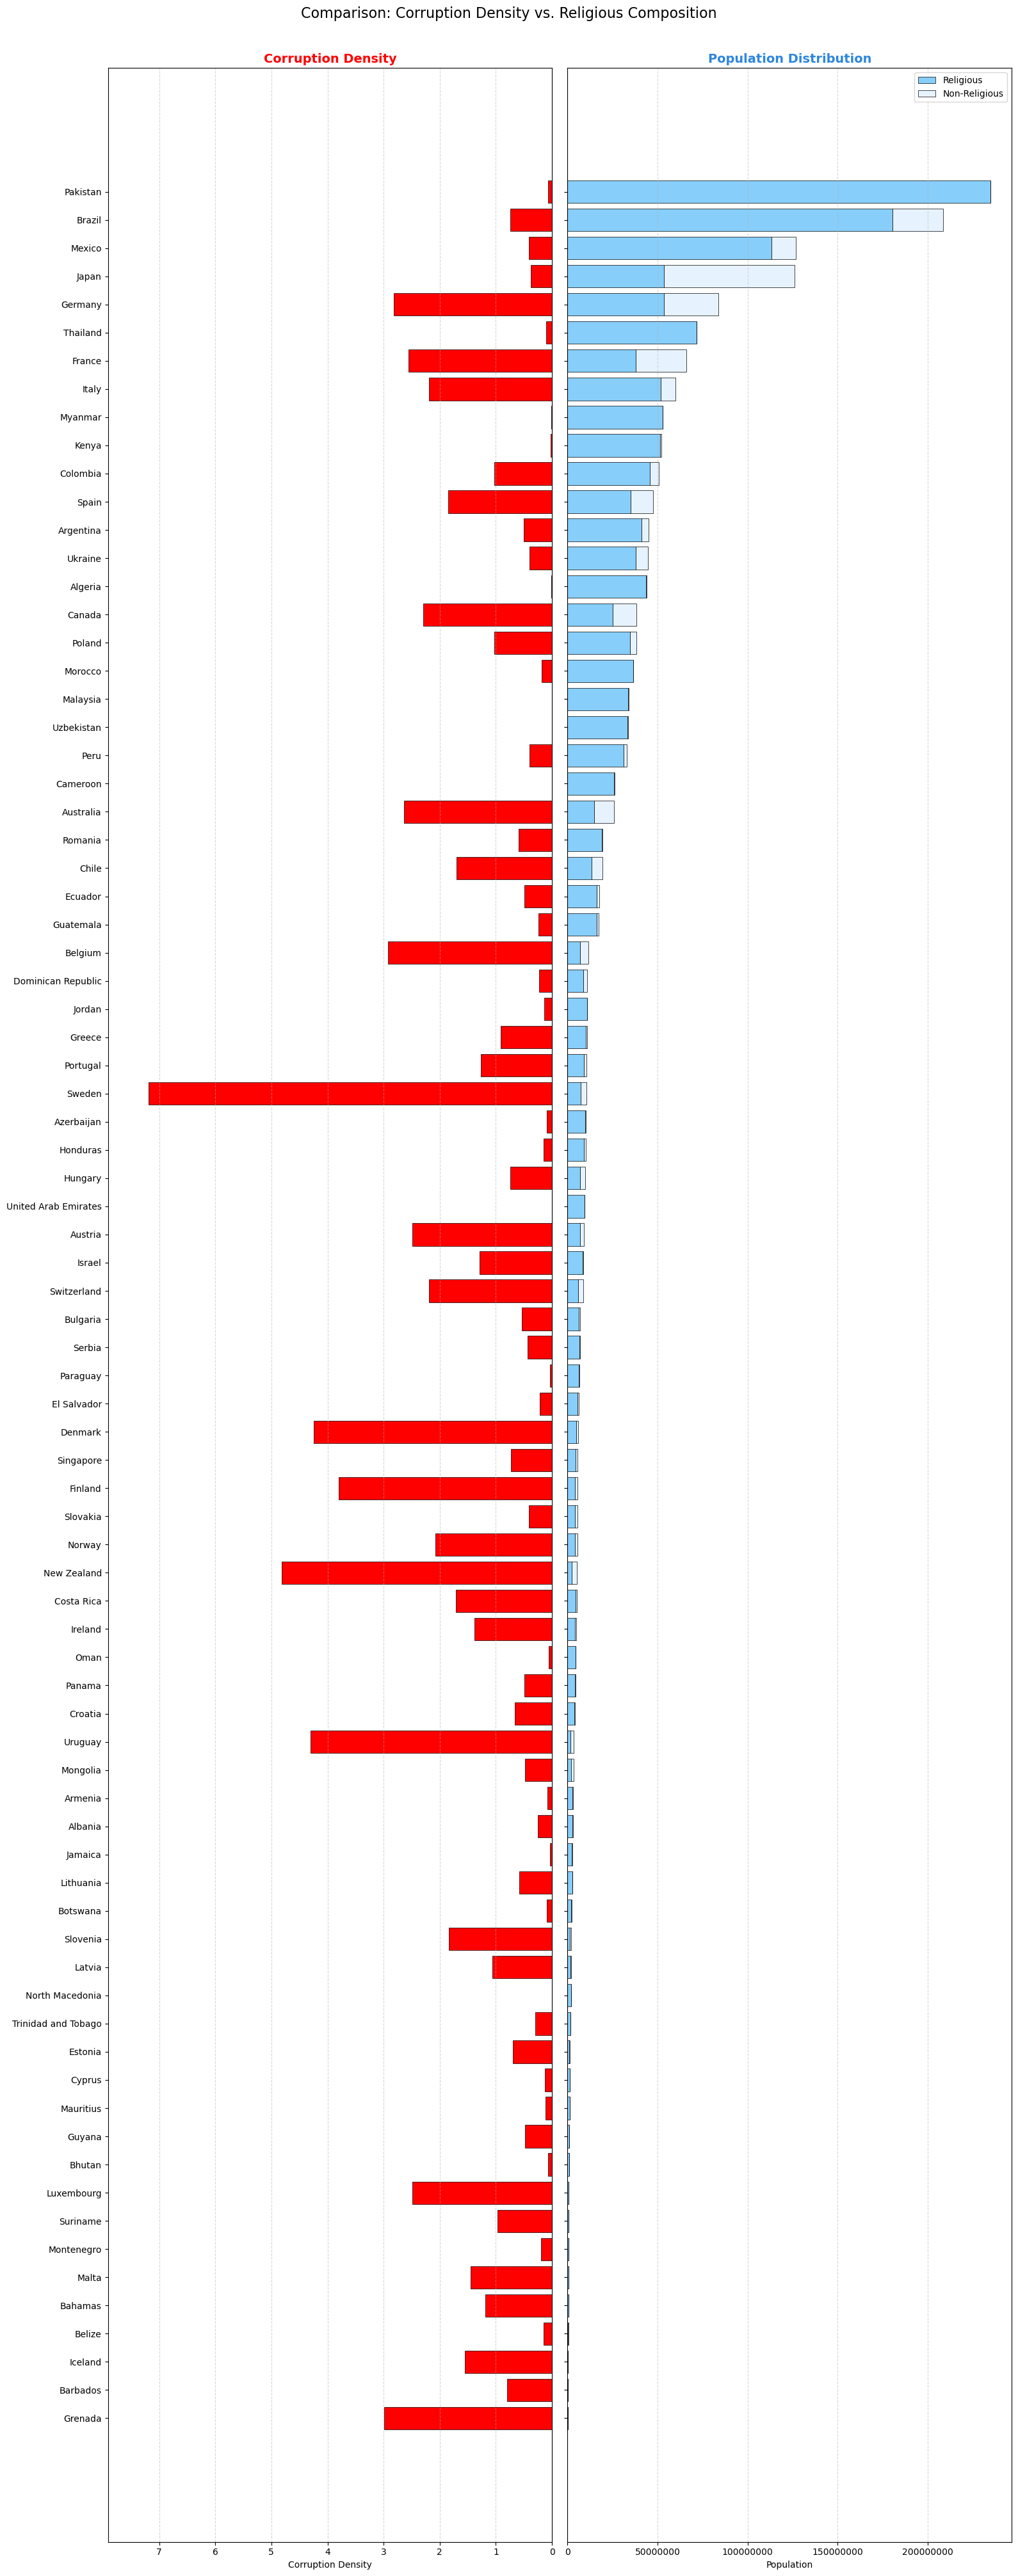

In [9]:
#Corruption vs religion plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =======================
# Load data
# =======================
df = pd.read_csv("final_1.csv")


# =======================
# Clean numeric columns
# =======================
cols_to_clean = [
    'Christians', 'Muslims', 'Buddhists', 'Hindus', 'Jews',
    'Other_religions', 'Religiously_unaffiliated',
    'Population', 'corruption_density'   # <-- Replace VALUE_hom
]

for col in cols_to_clean:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# =======================
# Filter & compute new columns
# =======================
#df_filtered = df[df['Population'] > 2000000].copy()
df_filtered = df.copy()
df_filtered['Non_Religious_Count'] = df_filtered['Religiously_unaffiliated']
df_filtered['Religious_Count'] = df_filtered['Population'] - df_filtered['Non_Religious_Count']

# =======================
# Sort countries by population
# =======================
df_sorted = df_filtered.sort_values(by='Population', ascending=True)

# =======================
# Create figure
# =======================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, len(df_sorted) * 0.5), sharey=True)

# =======================
# LEFT SIDE: Corruption Density
# =======================
ax1.barh(
    df_sorted['Country'],
    df_sorted['Corruption Density'],
    color='#FF0000',
    edgecolor='black',
    linewidth=0.5
)

ax1.set_xlim(max(df_sorted['Corruption Density']) * 1.1, 0)
ax1.set_xlabel('Corruption Density')
ax1.set_title('Corruption Density', fontsize=14, fontweight='bold', color='#FF0000')
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# =======================
# RIGHT SIDE: Religious vs Non-Religious (Stacked)
# =======================

p1 = ax2.barh(
    df_sorted['Country'],
    df_sorted['Religious_Count'],
    color='#87CEFA',
    label='Religious',
    edgecolor='black',
    linewidth=0.5
)

p2 = ax2.barh(
    df_sorted['Country'],
    df_sorted['Non_Religious_Count'],
    left=df_sorted['Religious_Count'],
    color='#E6F3FF',
    label='Non-Religious',
    edgecolor='black',
    linewidth=0.5
)

ax2.set_xlabel('Population')
ax2.set_title('Population Distribution', fontsize=14, fontweight='bold', color='#2e86de')
ax2.legend()
ax2.grid(axis='x', linestyle='--', alpha=0.5)
ax2.ticklabel_format(style='plain', axis='x')

plt.subplots_adjust(wspace=0.0)

plt.suptitle(
    'Comparison: Corruption Density vs. Religious Composition',
    fontsize=16,
    y=1.005
)

plt.tight_layout()
plt.show()


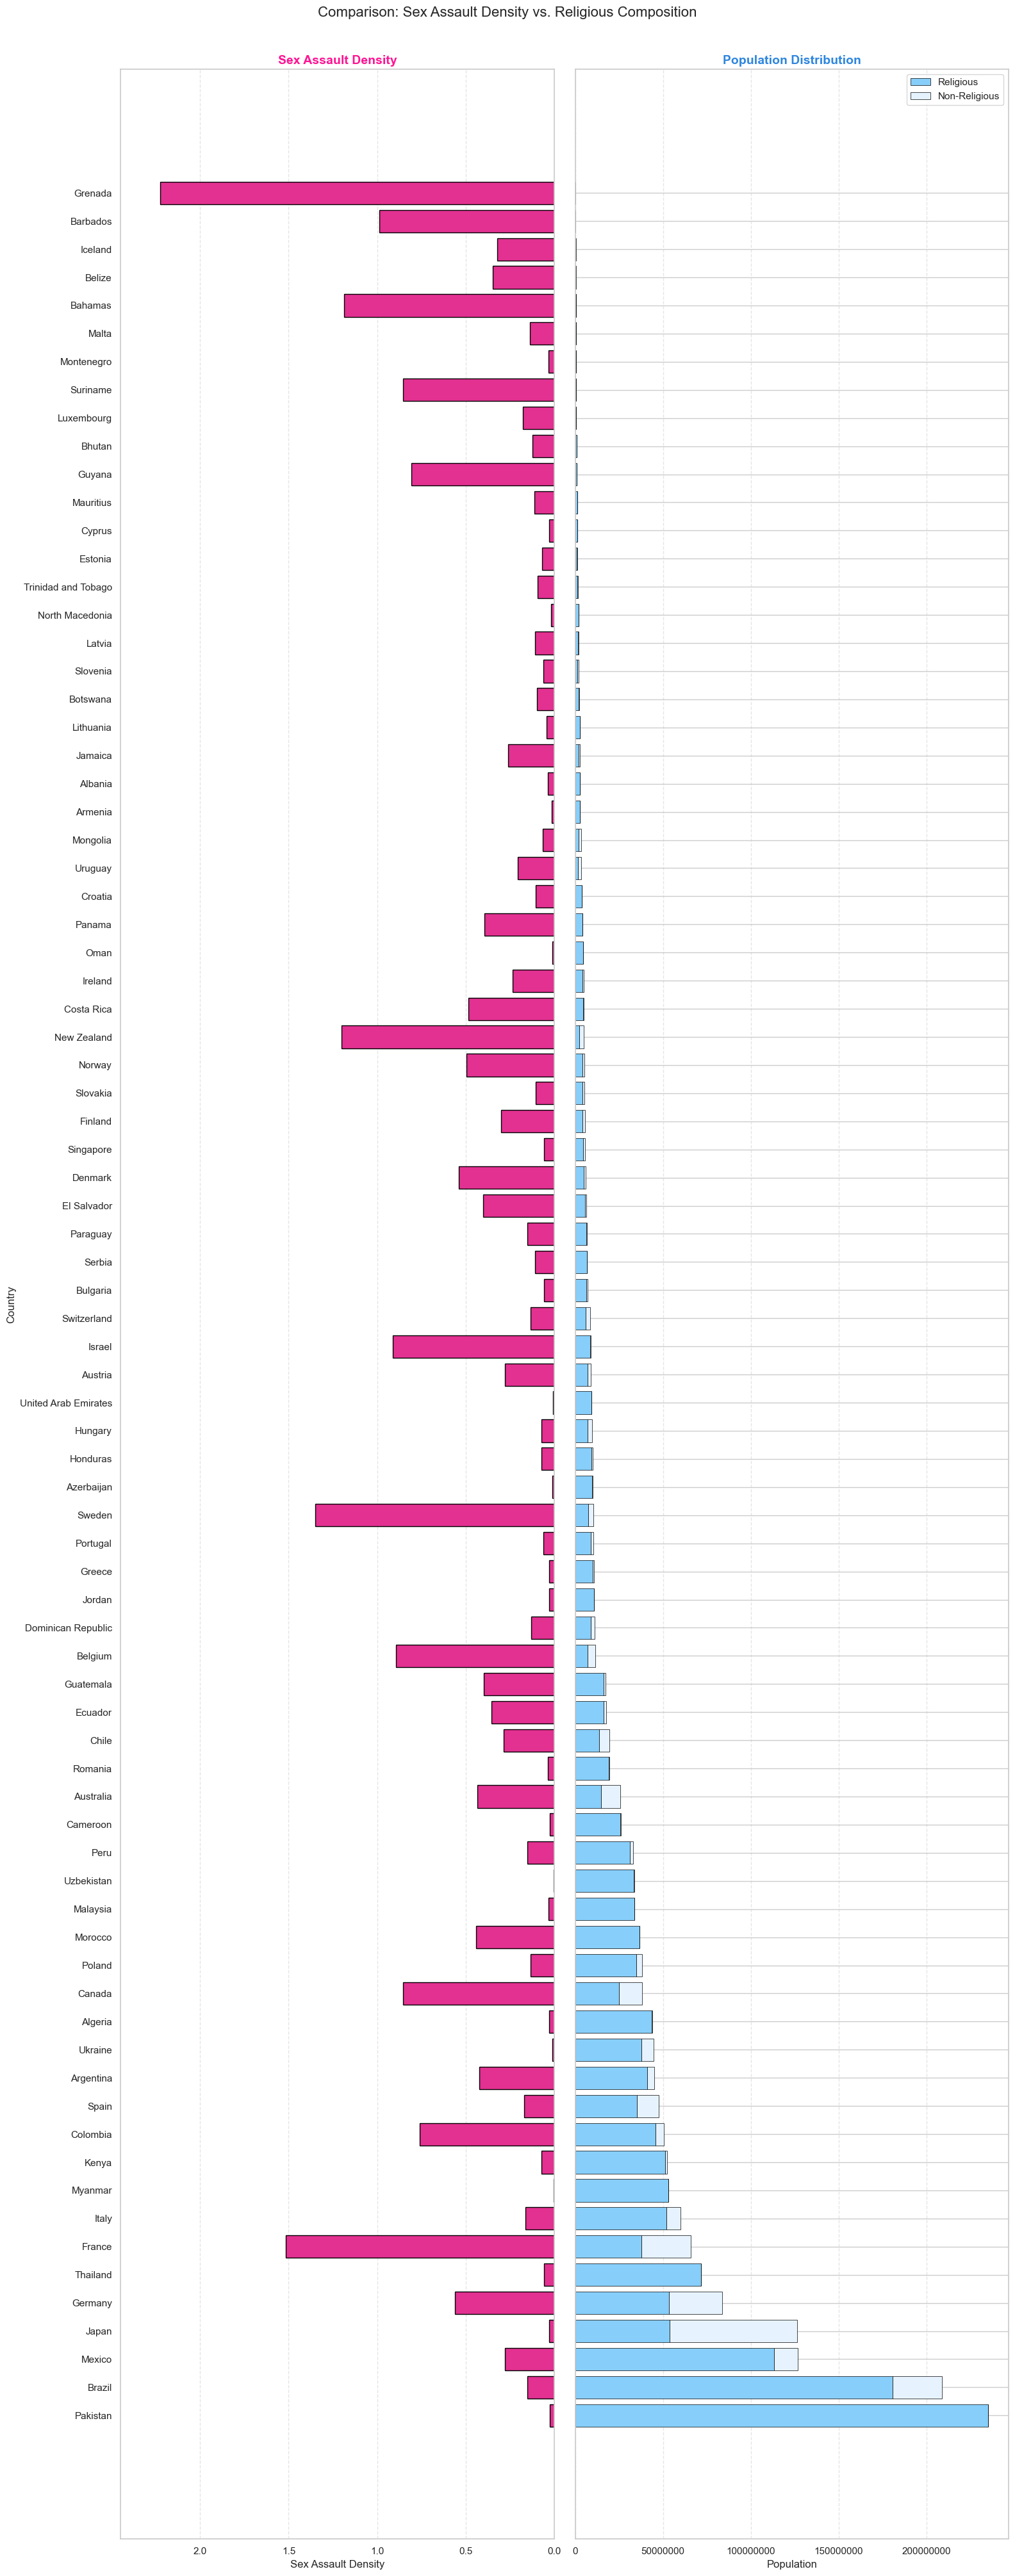

In [10]:
#Sex Assault vs religion plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# ==========================================
# Load data
# ==========================================
df = pd.read_csv("final_1.csv")

# ==========================================
# Clean numeric columns
# ==========================================
cols_to_clean = [
    'Christians', 'Muslims', 'Buddhists', 'Hindus', 'Jews',
    'Other_religions', 'Religiously_unaffiliated',
    'Population', 'VALUE_sex_assault'  # <-- NEW VARIABLE HERE
]

for col in cols_to_clean:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# ==========================================
# Filter large countries
# ==========================================
#df_filtered = df[df['Population'] > 2000000].copy()
df_filtered = df.copy()
# ==========================================
# Religious composition
# ==========================================
df_filtered['Non_Religious_Count'] = df_filtered['Religiously_unaffiliated']
df_filtered['Religious_Count'] = df_filtered['Population'] - df_filtered['Non_Religious_Count']

# ==========================================
# Sort
# ==========================================
df_sorted = df_filtered.sort_values(by='Population', ascending=True)

# ==========================================
# Create figure layout
# ==========================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, len(df_sorted) * 0.5), sharey=True)

# ==========================================
# LEFT PANEL — Sex Assault Density
# ==========================================
sns.barplot(
    y=df_sorted['Country'],
    x=df_sorted['Sex Assault Density'],    # <-- NEW VARIABLE
    ax=ax1,
    color='#FF1493',  # Pink-ish to signal assault-related variable
    edgecolor='black'
)

ax1.set_xlim(max(df_sorted['Sex Assault Density']) * 1.1, 0)
ax1.set_xlabel('Sex Assault Density')
ax1.set_title('Sex Assault Density', fontsize=14, fontweight='bold', color='#FF1493')
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# ==========================================
# RIGHT PANEL — Religious vs Non-religious
# ==========================================
ax2.barh(
    df_sorted['Country'],
    df_sorted['Religious_Count'],
    color='#87CEFA',
    label='Religious',
    edgecolor='black',
    linewidth=0.5
)

ax2.barh(
    df_sorted['Country'],
    df_sorted['Non_Religious_Count'],
    left=df_sorted['Religious_Count'],
    color='#E6F3FF',
    label='Non-Religious',
    edgecolor='black',
    linewidth=0.5
)

ax2.set_xlabel('Population')
ax2.set_title('Population Distribution', fontsize=14, fontweight='bold', color='#2e86de')
ax2.legend()
ax2.grid(axis='x', linestyle='--', alpha=0.5)
ax2.ticklabel_format(style='plain', axis='x')

# ==========================================
# Final layout
# ==========================================
plt.subplots_adjust(wspace=0.0)

plt.suptitle(
    'Comparison: Sex Assault Density vs. Religious Composition',
    fontsize=16,
    y=1.005
)

plt.tight_layout()
plt.show()


Columns found: ['Country', 'Year', 'Population', 'Christians', 'Muslims', 'Religiously_unaffiliated', 'Buddhists', 'Hindus', 'Jews', 'Other_religions', 'Religion Density', 'VALUE_hom', 'VALUE_sex', 'VALUES_corr', 'Homicide Density', 'Sex Assault Density', 'Corruption Density']


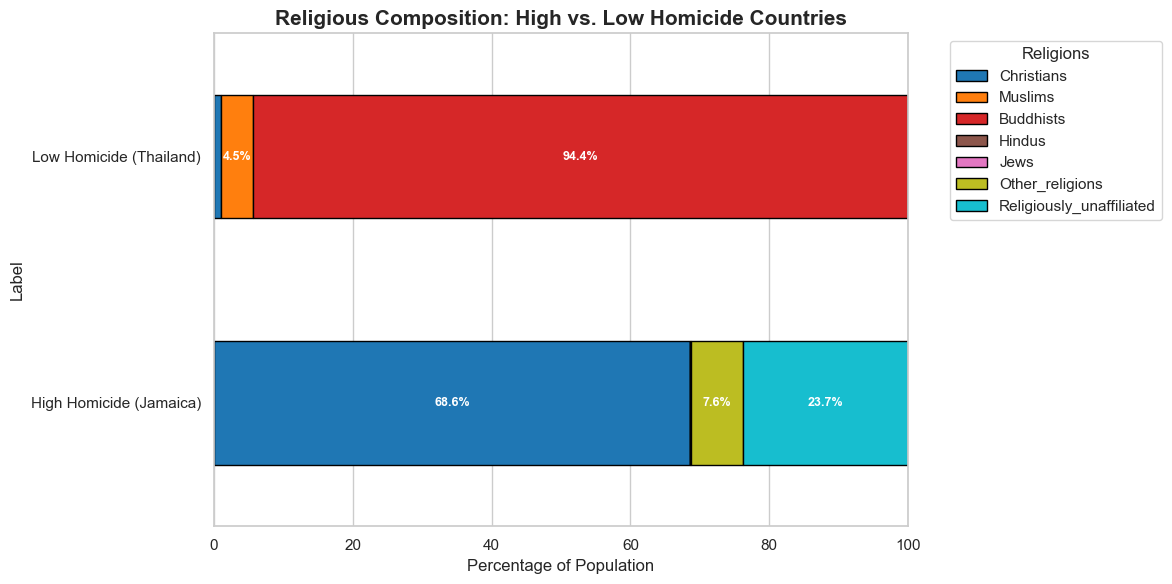

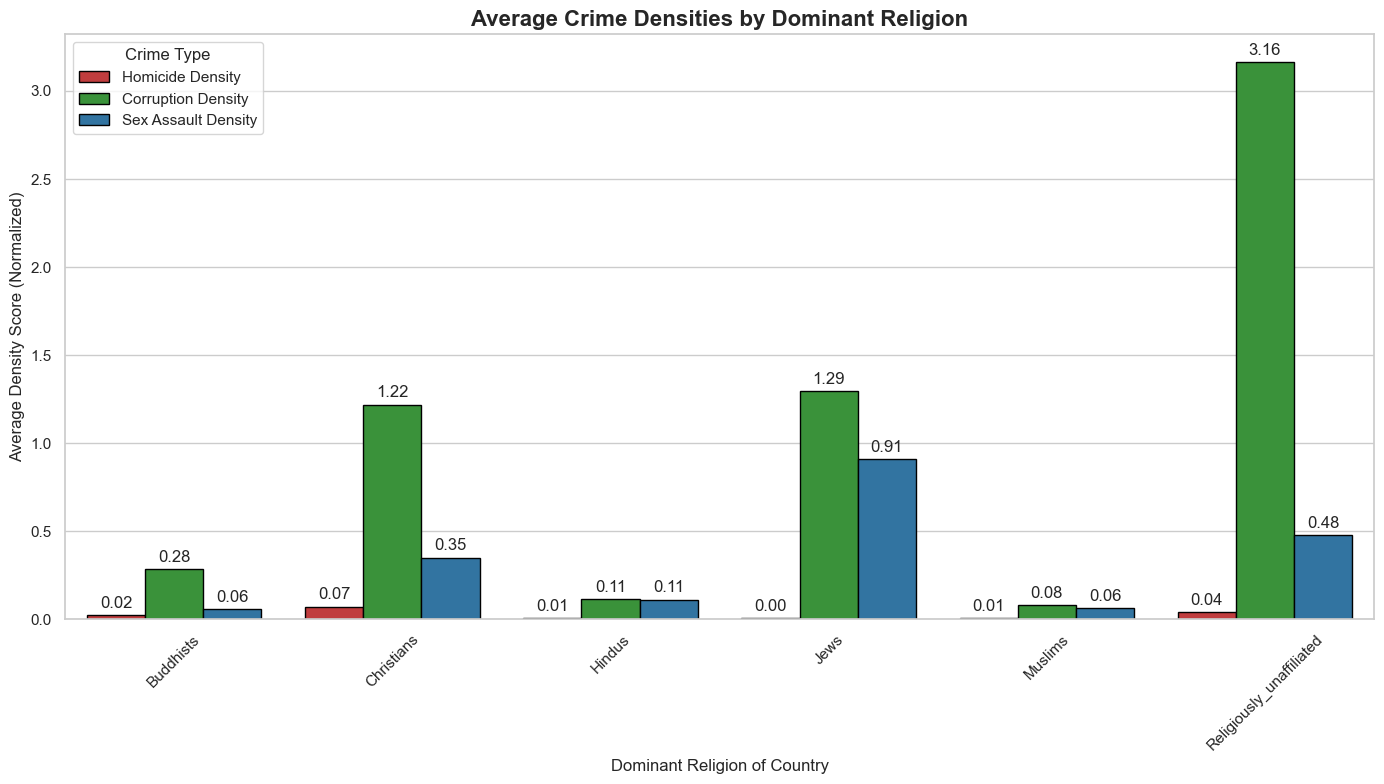

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==========================================
# 1. Load and Clean Data
# ==========================================
try:
    # Load the dataset
    df = pd.read_csv('final_1.csv')
    
    # FIX: Remove any leading/trailing spaces from column names
    df.columns = df.columns.str.strip()
    
    print("Columns found:", df.columns.tolist()) # Debugging print

except FileNotFoundError:
    print("Error: 'final_1.csv' not found. Trying to use an existing DataFrame from the notebook (fallback).")
    # Try common fallback variables defined elsewhere in the notebook
    fallback = None
    for varname in ['df_filtered', 'df_sorted', 'merged_df', 'df_clean', 'merged_df', 'df']:
        if varname in globals() and isinstance(globals()[varname], pd.DataFrame) and not globals()[varname].empty:
            fallback = globals()[varname].copy()
            print(f"Using fallback dataframe from variable '{varname}'.")
            break
    if fallback is not None:
        df = fallback
    else:
        print("No suitable fallback dataframe found. Creating empty df.")
        df = pd.DataFrame()

# List of columns to clean (remove commas and convert to numeric)
# We include all potential column names
numeric_cols = [
    'Christians', 'Muslims', 'Buddhists', 'Hindus', 'Jews', 
    'Other_religions', 'Religiously_unaffiliated', 'Population',
    'VALUE_hom', 'VALUE_sex', 'VALUES_corr', 
    'Homicide Density', 'Sex Assault Density', 'Corruption Density'
]

for col in numeric_cols:
    if col in df.columns:
        # Remove commas if they exist and convert to numeric
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

# ==========================================
# 2. Ensure Densities Exist (Safe Calculation)
# ==========================================

# HOMICIDE
if 'Homicide Density' not in df.columns or df['Homicide Density'].isnull().all():
    if 'VALUE_hom' in df.columns and 'Population' in df.columns:
        df['Homicide Density'] = (df['VALUE_hom'] / df['Population']) * 100
    else:
        print("⚠️ Warning: Could not calculate Homicide Density (Missing 'VALUE_hom'). Using available data.")

# SEX ASSAULT
if 'Sex Assault Density' not in df.columns or df['Sex Assault Density'].isnull().all():
    # Check for likely column names for Sex Assault values
    possible_cols = ['VALUE_sex', 'VALUE_sex_assault']
    found_col = next((c for c in possible_cols if c in df.columns), None)
    if found_col is not None and 'Population' in df.columns:
        # Safe calculation (per-100 basis)
        df['Sex Assault Density'] = (df[found_col] / df['Population']) * 100
    else:
        print("⚠️ Warning: Could not calculate Sex Assault Density. Using available data.")

# CORRUPTION
if 'Corruption Density' not in df.columns or df['Corruption Density'].isnull().all():
    if 'VALUES_corr' in df.columns and 'Population' in df.columns:
        df['Corruption Density'] = (df['VALUES_corr'] / df['Population']) * 100

# Drop rows where critical data is still missing for the plots
df_clean = df.dropna(subset=['Homicide Density', 'Population']).copy()

# ==========================================
# 3. Graphs 1 & 2: High vs Low Homicide Country Composition
# ==========================================

if not df_clean.empty:
    # Identify High and Low Homicide Countries
    high_hom_country = df_clean.loc[df_clean['Homicide Density'].idxmax()]
    low_hom_country = df_clean.loc[df_clean['Homicide Density'].idxmin()]

    # Prepare data for plotting
    comparison_countries = pd.concat([high_hom_country.to_frame().T, low_hom_country.to_frame().T])
    # Build labels safely from the two Series (avoid creating list-of-Series)
    labels = [
        f"High Homicide ({high_hom_country['Country']})",
        f"Low Homicide ({low_hom_country['Country']})"
    ]
    # ensure simple 0..n index so labels align with rows
    comparison_countries = comparison_countries.reset_index(drop=True)
    comparison_countries['Label'] = labels

    # Religion Columns
    religion_cols = ['Christians', 'Muslims', 'Buddhists', 'Hindus', 'Jews', 'Other_religions', 'Religiously_unaffiliated']
    
    # Calculate percentages for the stacked bar
    comp_data = comparison_countries.set_index('Label')[religion_cols]
    comp_data_pct = comp_data.div(comp_data.sum(axis=1), axis=0) * 100

    # Plotting Side-by-Side 100% Stacked Bar
    fig, ax = plt.subplots(figsize=(12, 6))
    comp_data_pct.plot(kind='barh', stacked=True, ax=ax, colormap='tab10', edgecolor='black')

    ax.set_xlabel('Percentage of Population')
    ax.set_title('Religious Composition: High vs. Low Homicide Countries', fontsize=15, fontweight='bold')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Religions')
    ax.set_xlim(0, 100)

    # Add text labels
    for n, x in enumerate([*comp_data_pct.index.values]):
        for (cs, ab, pc) in zip(comp_data_pct.iloc[n].cumsum(), 
                                comp_data_pct.iloc[n].cumsum() - comp_data_pct.iloc[n]/2, 
                                comp_data_pct.iloc[n]):
            if pc > 3: 
                plt.text(ab, n, str(round(pc, 1)) + '%', va='center', ha='center', color='white', fontsize=9, fontweight='bold')

    plt.tight_layout()
    plt.show()
else:
    print("Not enough data to generate Homicide comparison graphs.")

# ==========================================
# 4. Graph 3: Crime Densities by Dominant Religion
# ==========================================

if not df_clean.empty:
    # Determine "Dominant Religion"
    df_clean['Dominant_Religion'] = df_clean[religion_cols].idxmax(axis=1)

    # Group by Dominant Religion and calculate mean densities
    crime_means = df_clean.groupby('Dominant_Religion')[['Homicide Density', 'Corruption Density', 'Sex Assault Density']].mean()
    crime_means = crime_means.reset_index()

    # Melt for Grouped Bar Chart
    crime_melted = crime_means.melt(id_vars='Dominant_Religion', 
                                    var_name='Crime Type', 
                                    value_name='Average Density (%)')

    # Plotting
    plt.figure(figsize=(14, 8))
    sns.set_style("whitegrid")

    chart = sns.barplot(
        data=crime_melted,
        x='Dominant_Religion',
        y='Average Density (%)',
        hue='Crime Type',
        palette=['#d62728', '#2ca02c', '#1f77b4'],
        edgecolor='black'
    )

    plt.title('Average Crime Densities by Dominant Religion', fontsize=16, fontweight='bold')
    plt.xlabel('Dominant Religion of Country', fontsize=12)
    plt.ylabel('Average Density Score (Normalized)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='Crime Type')

    for container in chart.containers:
        chart.bar_label(container, fmt='%.2f', padding=3)

    plt.tight_layout()
    plt.show()

Methods
The analysis began with a simple question: if religion really shapes social behavior, then countries that differ in how religious their populations are should also differ in the levels of violence we see. To explore this, we first brought together several sources of information that all describe different sides of the same social environment. The homicide and sexual-crime counts came from UNODC, the religious composition numbers came from the Pew Research Center, and corruption indicators were added to give a sense of how strong or weak each country’s institutions may be. All of the data was restricted to the year 2020 so that every comparison reflects the same global moment rather than changes that occur over time.
Before we could meaningfully compare countries, we had to put them on equal footing. Raw crime counts alone say very little about how violent a society truly is, because a country with a small population will naturally report fewer incidents even if the underlying risk is high. For that reason, we converted homicide, sexual-assault, and corruption values into density measures by scaling each variable relative to the country’s population. The same logic applies to religion: countries differ dramatically in their size and religious diversity, so we summarized each country’s overall level of adherence through a measure we call Religion Density. This allowed us to talk about how “religious” a population is in a way that is comparable across the dataset.
Once the data was aligned and standardized, the analysis moved to a set of visual comparisons designed to show how these variables relate to one another. The first figures place homicide levels directly next to each country’s religious and nonreligious population, letting us see at a glance whether the most violent countries tend to be overwhelmingly religious, overwhelmingly secular, or somewhere in between. The same structure is repeated for corruption and sexual-assault density, because part of our question is whether religion corresponds uniquely to homicide or whether any connections disappear once other forms of crime and institutional weakness are considered.
To pull back from the country-by-country perspective, we also grouped nations by their dominant religion and calculated the average crime densities within each group. This step changes the scale of the question: instead of asking whether Mexico or Pakistan fits a pattern, we ask whether predominantly Christian, Muslim, Buddhist, Hindu, Jewish, or nonreligious societies follow noticeably different trajectories. It provides a broader view of the landscape and helps us understand whether the patterns we observe are tied to specific nations or to broader cultural contexts. We included a direct comparison between a high-homicide country and a low-homicide country to illustrate how religious composition looks inside each case. This serves as a more concrete anchor for the larger trends and makes it easier to see what it means, in practice, for a society to be “highly religious” in terms of its internal makeup.
These steps form a descriptive approach rather than a predictive one. The goal of the methods is not to force a statistical model but to build a clear, structured picture of the relationship between religion, violence, and the surrounding social environment. These visual comparisons create the foundation for the discussion that follows by showing where patterns appear, where they do not, and where the story becomes more complicated than a simple religious–secular divide.


Discussion
The comparisons begin with the homicide figure, which sets the tone for the entire analysis. When the homicide bars are placed next to the religious and nonreligious population distribution for each country, one thing becomes obvious right away: the crime values swing wildly from one nation to the next, but the religious composition barely shifts. Countries like Mexico, Brazil, and Colombia dominate the homicide side of the graph with immense bars that stretch far beyond the rest, while many other countries show almost no visible bar at all. Yet when the eye moves to the right side of the figure, the population bars remain overwhelmingly blue in nearly every case, signaling that most countries, violent or peaceful, are heavily religious.
This contrast is important. If religion had a strong and direct relationship with homicide levels, we would expect to see more alignment between the two sides of the figure. Instead, the homicide values expand and contract dramatically while the religious compositions stay almost still. Highly religious populations appear both in the safest and the most violent countries, and the same is true for countries with sizeable nonreligious populations. The graph does not show religious intensity moving in step with homicide levels; it shows the opposite: crime changes quickly, but religion does not.
A similar story emerges when corruption density is introduced. Corruption is often treated as a proxy for institutional strength, and the corruption graph makes clear how uneven this measure is across countries. Some nations exhibit extremely high corruption density, with bars extending far to the left, while others remain near zero. Yet once again, the religious composition on the right remains stable. The shapes do not mirror each other. Highly religious countries appear at both the high and low ends of corruption, and the same pattern holds for countries with noticeable nonreligious minorities. This graph shows that corruption—a deeply institutional problem—does not track with the religious share of the population any more than homicide does.
The sexual-assault density graph pushes this point even further because its distribution is even more erratic. Many countries show small or moderate levels, while others spike dramatically, with some bars reaching values several times higher than those around them. If religion were strongly connected to societal violence, we would expect to see at least some parallel movement in the religious-population bars next to these spikes. But again, the religious composition barely moves. The countries shift; the religion does not. This reinforces a main theme of the data: crime measures fluctuate in sharp and unpredictable ways, while religious adherence remains a stable background feature.
To anchor these broader patterns in a more tangible example, we compare a low-homicide country (Thailand) with a high-homicide country (Jamaica). Thailand’s religious profile is almost entirely Buddhist, with a small Muslim minority. Jamaica, on the other hand, is majority Christian with a significant unaffiliated population. The comparison highlights two important points. First, the internal religious structure of a country can look completely different depending on its history and cultural context. Second, that structure does not determine whether the country ends up on the high or low end of the homicide scale. A highly religious nation can be safe or violent; a religiously diverse nation can also be either. This figure illustrates why focusing on religion alone cannot explain crime outcomes: the internal distributions are too different, and the crime levels do not match those differences in a consistent way.
 By grouping countries according to their dominant religion and averaging their homicide, sexual-assault, and corruption densities, we step back and look at the broader landscape. The resulting chart does show variation across dominant religious groups, but not in a unified direction. Some groups have higher average corruption densities but lower homicide densities; others show the reverse. Some have elevated sexual-assault densities, while others cluster near zero. The pattern is not coherent enough to claim that any one religious tradition produces safer or more dangerous societies. Instead, the differences within each religious category are large enough that the averages only tell part of the story. When all the figures are viewed together, the narrative becomes clear: religion is present everywhere, but its presence alone does not map onto the levels of violence, corruption, or sexual assault seen across countries. Crime behaves like a volatile surface phenomenon, rising sharply in some places, falling in others, while religion behaves like a stable structural feature that nearly all societies possess in high proportions. The mismatch between these two rhythms explains why the graphs rarely move together. Religion may influence cultural norms or personal values, but the major drivers of crime appear to lie elsewhere: institutional strength, inequality, governance, social stability, and economic conditions that are not captured by religious affiliation.
The visual comparisons ultimately point toward a more nuanced understanding. Religion does not operate as a protective shield against violence or as a trigger for it. Instead, it seems to function as part of the social backdrop which is a shared cultural layer that exists in both safe and unsafe countries. The real story in the data is that crime varies far more with structural and institutional pressures than with how religious a population is. The graphs help make this clear by showing that crime moves while religion stays still, creating a consistent pattern of non-alignment across homicide, corruption, and sexual assault densities.




Additional Code not sure about this let me know (Has to be made pretty if used)

/var/folders/by/lm55639d4r1g0q6_y_ksv9qc0000gn/T/ipykernel_72049/3254238034.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

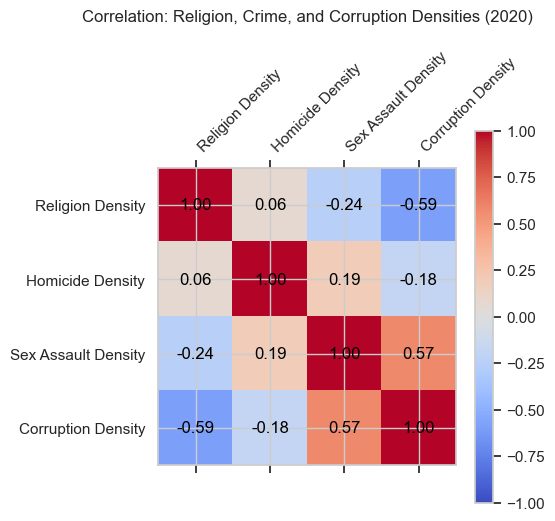

In [12]:
# Correlation Heatmap: Religion vs Crime and Corruption
# GETTING CORRELATION 
corr_cols = ["Religion Density", "Homicide Density",
             "Sex Assault Density", "Corruption Density"]
corr_matrix = df[corr_cols].corr()
plt.figure(figsize=(8, 6))
# Use matplotlib's matshow for a simple heatmap
cax = plt.matshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(cax)
# Tick labels
plt.xticks(range(len(corr_cols)), corr_cols, rotation=45, ha="left")
plt.yticks(range(len(corr_cols)), corr_cols)
# Write the correlation values on top of each square
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        value = corr_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", va="center", ha="center", color="black")
plt.title("Correlation: Religion, Crime, and Corruption Densities (2020)", pad=20)
plt.tight_layout()


Correlation Heatmap
The correlation heatmap adds a numeric layer to the descriptive patterns shown earlier, and its results reinforce the same central theme: religion does not move in step with crime or corruption. In the figure, Religion Density shows only extremely weak correlations with all three major outcomes, homicide, sexual assault, and corruption, each falling near zero. What stands out is not just the small size of these correlations but their inconsistency. For example, Religion Density has a slight positive correlation with homicide and sexual assault, yet a negative correlation with corruption, and none of these values approach a level that would suggest a meaningful relationship.
Just as the earlier bar graphs showed crime levels rising and falling independently of religious composition, the heatmap quantifies that independence. Homicide Density correlates more strongly with Sexual Assault Density and Corruption Density than it does with religion, which highlights a broader point: the forces shaping crime appear to be institutional and structural rather than cultural or religious. The heatmap therefore strengthens the argument that religion functions as a relatively stable background variable, while crime behaves as a volatile outcome shaped by governance, economic conditions, and social stability. The near-zero correlation values make this point clear in a way that purely visual comparisons cannot.



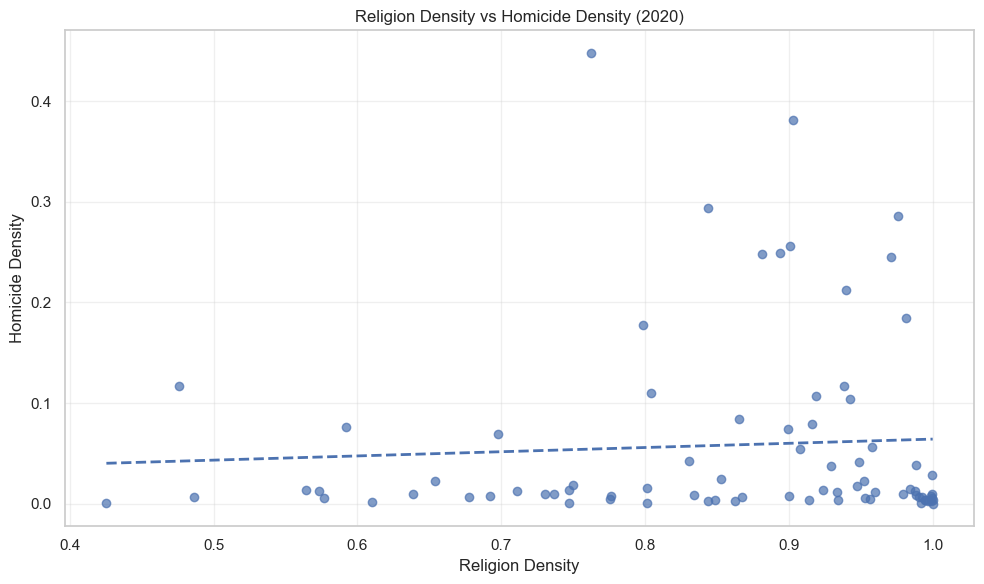

Trend line slope: 0.0418
Trend line intercept: 0.0223


In [14]:
#scatterplot: Religion Density vs Homicide Density 
plt.figure(figsize=(10, 6))
x = df["Religion Density"]
y = df["Homicide Density"]
# Scatter points
plt.scatter(x, y, alpha=0.7)
# Simple linear trend line using numpy
coeffs = np.polyfit(x, y, 1)   # [slope, intercept]
trend_line = np.poly1d(coeffs)
x_sorted = np.sort(x)
plt.plot(x_sorted, trend_line(x_sorted), linestyle="--", linewidth=2)
plt.xlabel("Religion Density")
plt.ylabel("Homicide Density")
plt.title("Religion Density vs Homicide Density (2020)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print("Trend line slope:", round(coeffs[0], 4))
print("Trend line intercept:", round(coeffs[1], 4))



Scatterplot 
The scatterplot between Religion Density and Homicide Density provides a different kind of clarity: one rooted in the behavior of individual data points rather than averages or grouped comparisons. When each country is plotted on its own, the resulting cloud of points shows no visible pattern or direction. Countries with extremely high homicide densities sit alongside countries with very low homicide densities at all levels of religious adherence, from moderately religious societies to those that are nearly universally religious. The fitted trend line, nearly flat across the graph, quantifies this lack of association: the slope is close to zero, indicating that increases in religious population share do not correspond to increases or decreases in homicide rates.
This visualization supports the earlier observation that crime is a rapidly fluctuating phenomenon, while religion remains stable. If religion played a determinative role in shaping homicide levels, we would expect to see some clustering perhaps safer countries at one end of the religious spectrum and more violent countries at the other. Instead, the scatterplot shows the opposite: religion is evenly distributed across both the safest and most violent nations in the dataset. The lack of a discernible pattern strengthens the idea that homicide is influenced by factors that vary dramatically from place to place: such as governance, inequality, and institutional strength, rather than by the overall religiosity of the population. In this sense, the scatterplot serves as a concrete demonstration of the broader conclusion that religion alone cannot explain variations in homicide across countries.

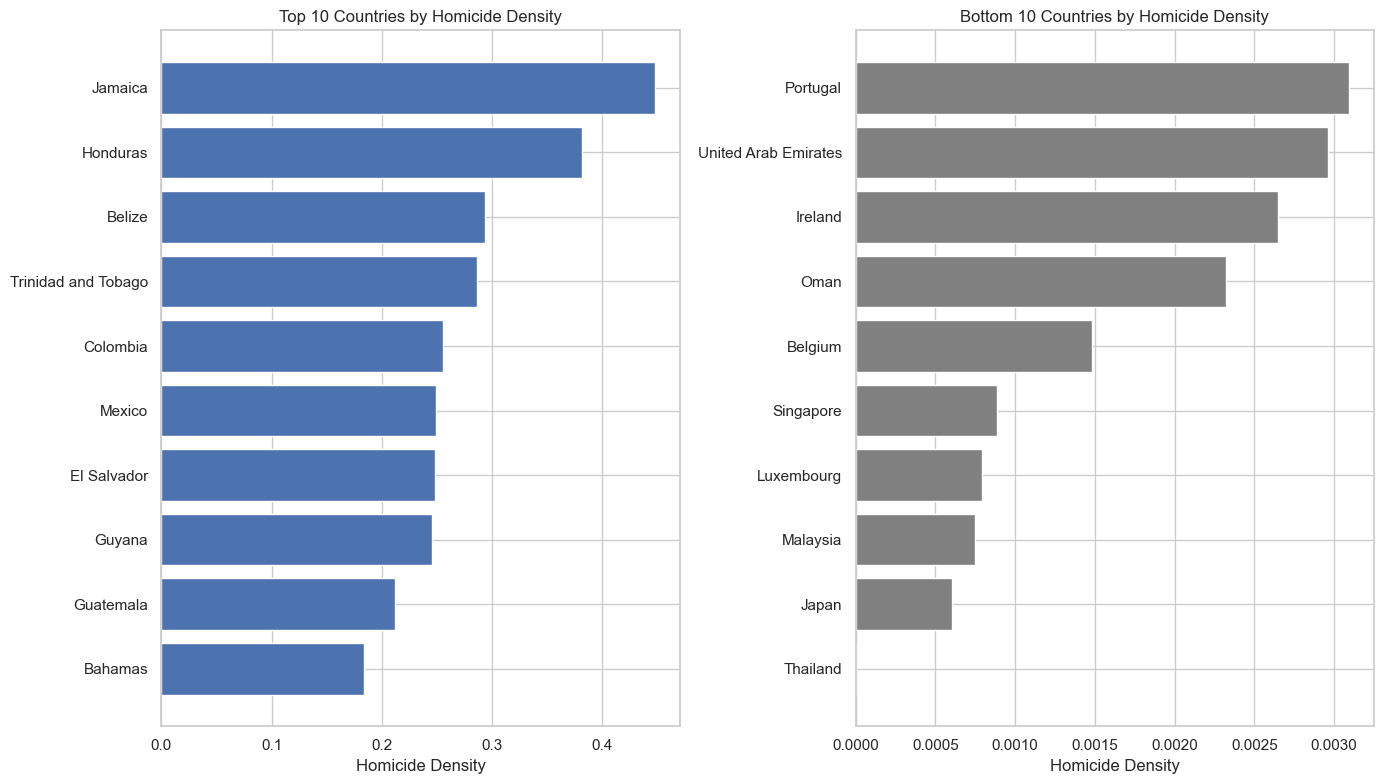

In [15]:
# - Top 10 and Bottom 10 Countries by Homicide Density 
# Sort by homicide density
df_sorted = df.sort_values("Homicide Density", ascending=False)
top10 = df_sorted.head(10)
bottom10 = df_sorted.tail(10)
plt.figure(figsize=(14, 8))
# Top 10 (highest homicide density)
plt.subplot(1, 2, 1)
plt.barh(top10["Country"], top10["Homicide Density"])
plt.gca().invert_yaxis()  # Highest at the top
plt.xlabel("Homicide Density")
plt.title("Top 10 Countries by Homicide Density")
# Bottom 10 (lowest homicide density)
plt.subplot(1, 2, 2)
plt.barh(bottom10["Country"], bottom10["Homicide Density"], color="gray")
plt.gca().invert_yaxis()
plt.xlabel("Homicide Density")
plt.title("Bottom 10 Countries by Homicide Density")
plt.tight_layout()
plt.show()

